In [169]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

In [63]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\python codes\\project in analysis\\RainfallPrediction'

In [65]:
df1=pd.read_csv('weatherAUS.csv')

In [66]:
# This app is used to predict A day in which there will be a rain in a country

In [67]:
df1.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [72]:
raw_df=df1.copy()

In [75]:
# as a data analysis you have to keep the original data and a copy for the predictions

In [77]:
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [79]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [81]:
# checking for null values
pd.isnull(raw_df).sum().sum() # reversed justu you can also write it as df.isnull().sum()

306987

In [83]:
##### since we are working on a data we need to group the data based on the date.
year=pd.to_datetime(raw_df.Date).dt.year

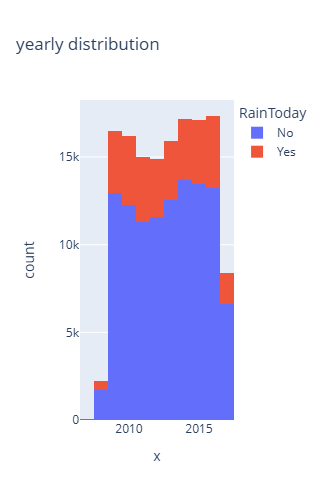

In [85]:
height=500
px.histogram(raw_df,x=year,color='RainToday',title='yearly distribution',height=height)

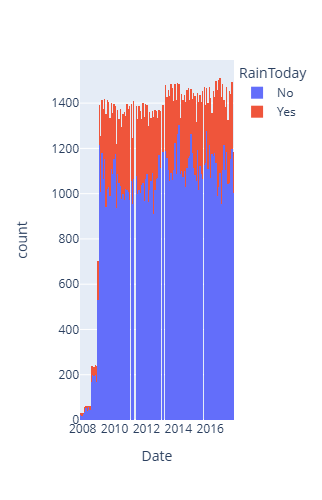

In [87]:
px.histogram(raw_df,x=raw_df.Date,height=height,color='RainToday')

In [88]:
# we are going to split the data using the 2014 as out pivot of spliting our model
train_val_df,test=train_test_split(raw_df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)
# now data has being split into margins of 75 to train,val_df to 25 to validation,test is 20

In [89]:
train_df=raw_df[year<2014]
val_df=raw_df[year==2014]
test_df=raw_df[year>2014]

In [90]:
# selecting the inputs and target columns

In [92]:
# lets forcus on the train in model since we are going to work more on it.

In [93]:
train_df.head(2)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   

   RainTomorrow  
0            No  
1            No  

[2 rows x 23 columns]

In [95]:
# getting the inputs and the targets of the model
inputs,target=list(train_df.columns)[1:-1],'RainTomorrow'

In [96]:
train_inputs,train_target=train_df[inputs],train_df[target]
val_inputs,val_target=val_df[inputs],val_df[target]
test_inputs,test_target=test_df[inputs],test_df[target]

In [97]:
# filling all the nan values with the imputer function
imputer=SimpleImputer(strategy='mean')

In [99]:
# making numerical cols and categorical columns
numerical_cols=train_inputs.select_dtypes(include=np.number).columns.to_list()
categorical_cols=train_inputs.select_dtypes('object').columns.to_list()

In [100]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [101]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [102]:
# filling in with the  mean values
imputer.fit(raw_df[numerical_cols])


SimpleImputer()

In [103]:
train_inputs[numerical_cols]=imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=imputer.transform(test_inputs[numerical_cols])

C:\Users\HP\AppData\Local\Temp\ipykernel_14124\1545939497.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_14124\1545939497.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_14124\1545939497.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [104]:
# now the scalers  of the columns are too much so we need to make all in sample form for use it to train the model

In [117]:
scaler=MinMaxScaler()

In [121]:
# always remember that we fit on the entire data not on some part of data
scaler.fit(raw_df[numerical_cols])

MinMaxScaler()

In [122]:

train_inputs[numerical_cols]=scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=scaler.transform(test_inputs[numerical_cols])

C:\Users\HP\AppData\Local\Temp\ipykernel_14124\850849017.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_14124\850849017.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_14124\850849017.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [125]:
train_inputs[numerical_cols]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.516509  0.523629  0.001617     0.037741  0.526244       0.294574   
1       0.375000  0.565217  0.000000     0.037741  0.526244       0.294574   
2       0.504717  0.576560  0.000000     0.037741  0.526244       0.310078   
3       0.417453  0.620038  0.000000     0.037741  0.526244       0.139535   
4       0.613208  0.701323  0.002695     0.037741  0.526244       0.271318   
...          ...       ...       ...          ...       ...            ...   
144183  0.660377  0.856333  0.000000     0.037741  0.526244       0.224806   
144184  0.660377  0.918715  0.000000     0.037741  0.526244       0.286822   
144185  0.778302  0.905482  0.000000     0.037741  0.526244       0.310078   
144186  0.761792  0.905482  0.000000     0.037741  0.526244       0.488372   
144187  0.721698  0.903592  0.000000     0.037741  0.526244       0.387597   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.153846      0.275862         0.71         0.22     0.449587   
1           0.030769      0.252874         0.44         0.25     0.497521   
2           0.146154      0.298851         0.38         0.30     0.447934   
3           0.084615      0.103448         0.45         0.16     0.613223   
4           0.053846      0.229885         0.82         0.33     0.500826   
...              ...           ...          ...          ...          ...   
144183      0.115385      0.275862         0.28         0.12     0.485950   
144184      0.084615      0.103448         0.13         0.08     0.461157   
144185      0.253846      0.275862         0.21         0.08     0.494215   
144186      0.084615      0.425287         0.35         0.17     0.492562   
144187      0.069231      0.195402         0.29         0.14     0.489256   

        Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  
0            0.4800  0.888889  0.499917  0.508439  0.522073  
1            0.4912  0.492351  0.499917  0.514768  0.570058  
2            0.5056  0.492351  0.222222  0.594937  0.548944  
3            0.5712  0.492351  0.499917  0.533755  0.612284  
4            0.4624  0.777778  0.888889  0.527426  0.673704  
...             ...       ...       ...       ...       ...  
144183       0.4464  0.492351  0.499917  0.803797  0.857965  
144184       0.4416  0.492351  0.499917  0.875527  0.900192  
144185       0.4656  0.492351  0.499917  0.818565  0.892514  
144186       0.4784  0.492351  0.499917  0.827004  0.844530  
144187       0.4672  0.492351  0.499917  0.871308  0.888676  

[80807 rows x 16 columns]

In [127]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [131]:
# still on preprocessing
# the model can not be train if there is still a columns that has no number
# performing oneHotEncoding
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(raw_df[categorical_cols].fillna('unknown'))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [133]:
train_inputs[categorical_cols]

Location WindGustDir WindDir9am WindDir3pm RainToday
0        Albury           W          W        WNW        No
1        Albury         WNW        NNW        WSW        No
2        Albury         WSW          W        WSW        No
3        Albury          NE         SE          E        No
4        Albury           W        ENE         NW        No
...         ...         ...        ...        ...       ...
144183    Uluru          NE        NNW        ESE        No
144184    Uluru         SSE        NNW         SE        No
144185    Uluru          NE          E        NNE        No
144186    Uluru         NNW          N         NW        No
144187    Uluru           W          W          N        No

[80807 rows x 5 columns]

In [135]:
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [137]:
train_inputs[encoded_cols]

KeyError: "None of [Index(['Location_Adelaide', 'Location_Albany', 'Location_Albury',\n       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',\n       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',\n       'Location_Canberra',\n       ...\n       'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW',\n       'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW',\n       'WindDir3pm_unknown', 'RainToday_No', 'RainToday_Yes'],\n      dtype='object', length=102)] are in the [columns]"

In [139]:
# with one OneHotEncoder we are able to make each column to be read as numbers so that we can predict our model

In [141]:
import warnings

In [143]:
# transforming stage

warnings.filterwarnings('ignore')
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols].fillna('unknown'))
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols].fillna('unknown'))
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols].fillna('unknown'))
pd.set_option('display.max_columns',None)

In [144]:
# done with preprocessing of data

In [145]:
#saving the data preprocessed
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

In [146]:
train_inputs=pd.read_parquet('train_inputs.parquet')
val_inputs=pd.read_parquet('val_inputs.parquet')
test_inputs=pd.read_parquet('test_inputs.parquet')
train_target=pd.read_parquet('train_target.parquet')[target]
val_target=pd.read_parquet('val_target.parquet')[target]
test_target=pd.read_parquet('test_target.parquet')[target]

In [149]:
numerical_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [153]:
## now 1 20 2025
## using the logicalRegression to predict the model
model=LogisticRegression(solver='liblinear')
model.fit(train_inputs[numerical_cols+encoded_cols],train_target)

LogisticRegression(solver='liblinear')

In [165]:
# checking the weights that makes more rainfall to occur
all_weigth=pd.DataFrame(
{
    'Features':(numerical_cols+encoded_cols),
    'weight':(model.coef_.tolist()[0])
              }

)

<Axes: xlabel='Features', ylabel='weight'>

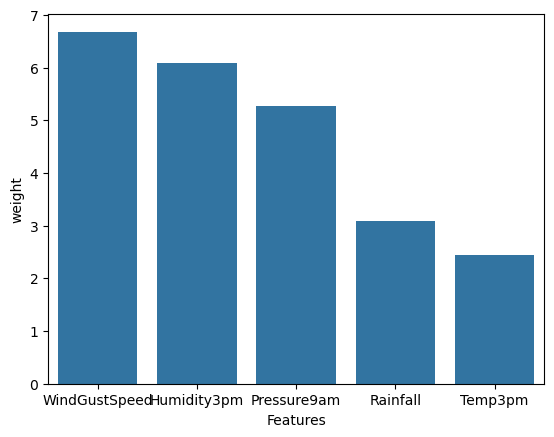

In [173]:
sns.barplot(data=all_weigth.sort_values(by='weight',ascending=False).head(5),x='Features',y='weight')

# we have fit the data into the model we need to make all the columns in line

In [176]:
X_train=train_inputs[numerical_cols+encoded_cols]
X_val=val_inputs[numerical_cols+encoded_cols]
X_test=test_inputs[numerical_cols+encoded_cols]

In [178]:
train_preds=model.predict(X_train)

In [180]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [182]:
# lets check the confidentiality of our prediction in it's probability
model.predict_proba(X_train)

array([[0.94294221, 0.05705779],
       [0.93963228, 0.06036772],
       [0.9615229 , 0.0384771 ],
       ...,
       [0.98249534, 0.01750466],
       [0.87222388, 0.12777612],
       [0.927964  , 0.072036  ]])

In [184]:
# now check,the model is too confident to say it will not rain on a certain period lists check.
model.classes_

array(['No', 'Yes'], dtype=object)

In [186]:
# now after every prediction you need to check whether there is and accuracy of a number getting to 100

In [188]:
from sklearn.metrics import accuracy_score

In [190]:
# this is used to check the accuracy of the model and so the predicted and the train_target
accuracy_score(train_target,train_preds)

0.8511267588203992

In [191]:
from sklearn.metrics import confusion_matrix

In [194]:
confusion_matrix(train_preds,train_target,normalize='true')

array([[0.87278588, 0.12721412],
       [0.26007743, 0.73992257]])

# the model is good to be used because among the day it was supposed not to rain  it predicted 0.872 greater than 0.12 so good
# now when it was supposed to rain it predicted 0.26 as no and now predicted 0.7399 that it will rain which is good on its yes being greater than its no's

In [197]:
import plotly.express as px
import seaborn as sns

In [199]:
# predicting all using a function
def predict_now(inputs,target,name=''):
    preds=model.predict(inputs)
    accuracy=accuracy_score(preds,target)
    print('accuracy is {:.2f}%'.format(accuracy*100))
    cf=confusion_matrix(preds,target,normalize='true')
    sns.heatmap(cf,annot=True)
    plt.title('{} data of Confusion Matrix'.format(name));plt.xlabel('Predictions');plt.ylabel('targets')

accuracy is 85.11%


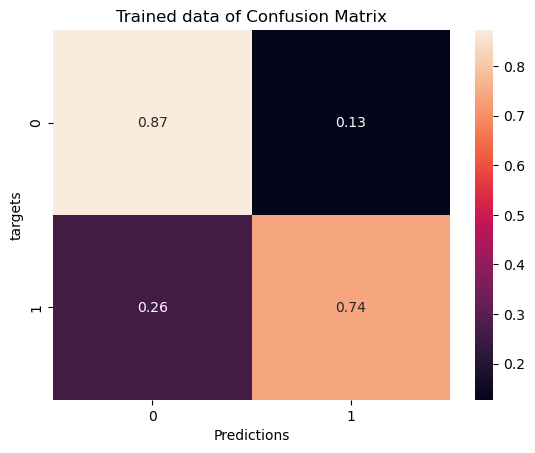

In [201]:
predict_now(X_train,train_target,'Trained')


accuracy is 85.72%


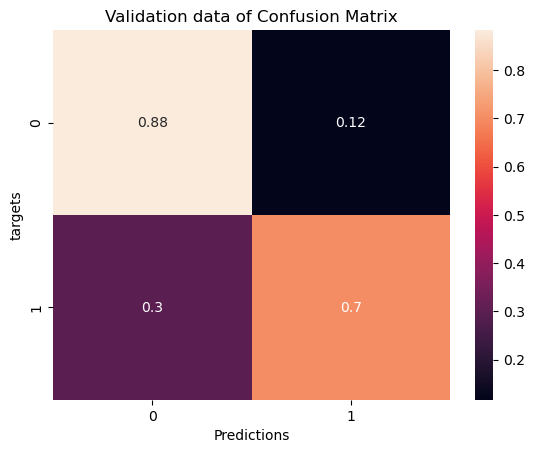

In [202]:
predict_now(X_val,val_target,'Validation')


accuracy is 84.65%


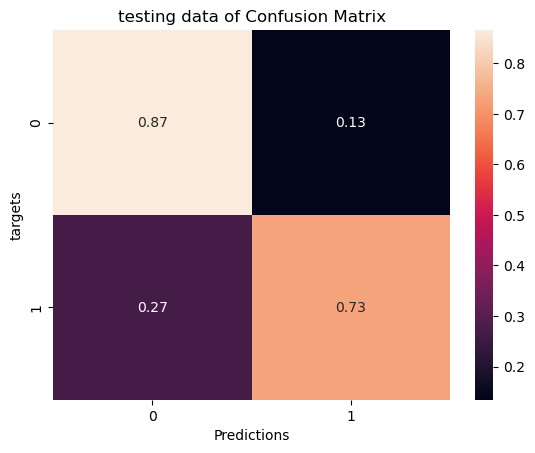

In [203]:
predict_now(X_test,test_target,'testing')

In [204]:
import joblib as job

In [205]:
Rain={
     'model':model,
    'imputer':imputer,
    'encoder':encoder,
    'scaler':scaler,
    'inputs':inputs,
    'target':target,
    'numerical_cols':numerical_cols,
    'categorical_cols':categorical_cols,
    'encoded_cols':encoded_cols
}

In [207]:
job.dump(Rain,'Rain.joblib')

['Rain.joblib']

In [213]:
Rain=job.load('Rain.joblib')